# To predict loan status



### Business Objective:
To predict the impact of the incident raised by the customer.

### Data Set Details:
It’s not at all easy to get a loan from the bank. Getting a loan approved requires a complex mix of factors not the least of which is a steady income! So this ML project aims **to create a model that will classify how much loan the user can obtain** based on various factors such as the user’s marital status, income, education, employment prospects, number of dependents, etc. The dataset attached provides details about all these factors which can then be used to create an ML model that demonstrates the amount of loan that can be approved

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
data_train = pd.read_csv("train.csv")
train=data_train.copy()
data_test=pd.read_csv("test.csv")
test=data_test.copy()

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

## Exploratory Data Analysis

In [5]:
# look the data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
#check no. of rows and columns
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.dtypes #checking the datatypes of the features.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [11]:
#Counting the null values
train.isnull().sum()       #Iwe can see that the Credit_History has highest number of null values in the dataset.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#Checking null values for test dataset
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
#describe the numerical columns
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


## Univariate Analysis

### Independent Variable: Categorical Data Analysis

#### Analysis on Feature "Gender"

In [15]:
train['Gender'].count()    #Total number of count in Gender column

601

In [16]:
train['Gender'].value_counts()    #Total values belongs to each class in the Gender column

Male      489
Female    112
Name: Gender, dtype: int64

In [17]:
train['Gender'].value_counts(normalize=True)*100

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

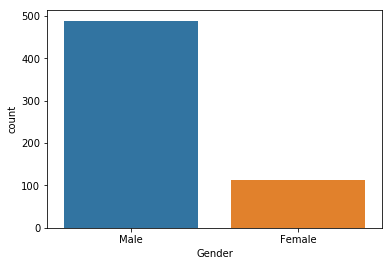

In [18]:
#Visualizing of each class from Gender column
sns.countplot('Gender',data=train) 

Conclusion : 81% of the applicants applied for the loan are males and remaining are female i.e out of 601 applicants 489 are male and 112 are female. 

#### Analysis on Feature "Married"

In [19]:
#Total number of count in Married column
train['Married'].count()

611

In [20]:
#Total values belongs to each class in the Married column
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
train['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

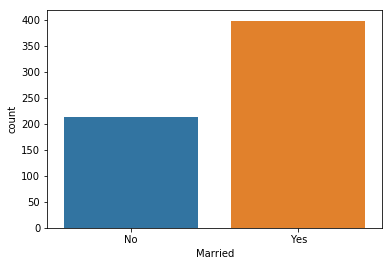

In [22]:
#Visualizing of each class from Married column
sns.countplot('Married',data=train)

Conclusion : 65% of the applicants i.e 398 applicants are married have applied for the loan.

#### Analysis on Feature "Self_Employed" 

In [23]:
#Total number of count in Self_Employed column
train['Self_Employed'].count()

582

In [24]:
#Total values belongs to each class in the Self_Employed column
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
train['Self_Employed'].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

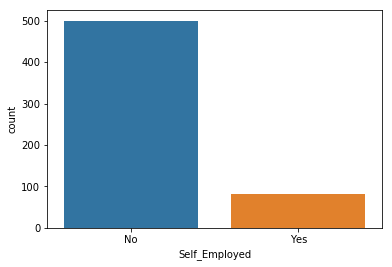

In [26]:
#Visualizing of each class from Gender column
sns.countplot('Self_Employed',data=train)

Conclusion : 86% of the applicants applying for the loan are not self employed i.e out of 582 applicants 500 are NOT Self Employed only 82 applicants are.

#### Analysis on Feature "Credit_History"

In [27]:
#Total number of count in Credit_History column
train['Credit_History'].count()

564

In [28]:
#Total values belongs to each class in the Credit_History column
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [29]:
train['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

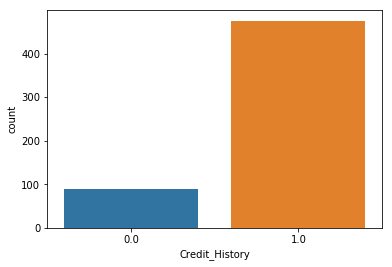

In [30]:
#Visualizing of each class from Credit_History column
sns.countplot('Credit_History',data=train)

84% of the applicants who have credit history have applied for the loan i.e out of 564 applicants 475 have paid their debts and 89 applicants haven't.

### Independent Variable: Ordinal Data Analysis

#### Analysis on Feature Education 

In [31]:
#Total values belongs to Education column
train['Education'].count()

614

In [32]:
#Total values belongs to each class in the Education column
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [33]:
train['Education'].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

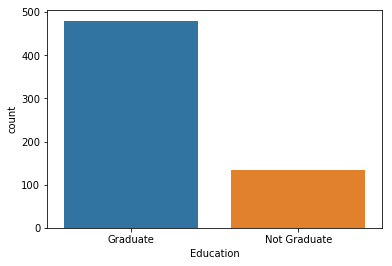

In [34]:
#Visualizing of each class from Education column
sns.countplot('Education',data=train)

78% of the applicants who are graduated have applied for the loan i.e out of 614 applicants 480 are Graduated and 134 are not Graduated.

#### Analysis on Feature Property_Area

In [35]:
#Total values belongs to Property_Area column
train['Property_Area'].count()

614

In [36]:
#Total values belongs to each class in the Property_Area column
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [37]:
train['Property_Area'].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

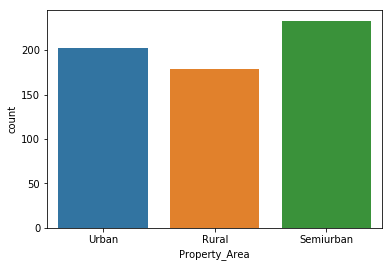

In [38]:
#Visualizing of each class from Property_Area column
sns.countplot('Property_Area',data=train)

Applicants from all the property area applied for the loan in which 38% are Semiurban, 33% are Urban and 29% are Rural

#### Analysis on Feature Dependents

In [39]:
#Total values belongs to Dependents column
train['Dependents'].count()

599

In [40]:
#Total values belongs to each class in the Dependents column
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [41]:
train['Dependents'].value_counts(normalize=True)*100

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

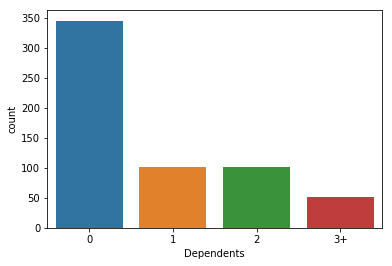

In [42]:
#Visualization of Dependents column
sns.countplot('Dependents',data=train)

57% of the applicants don't have any dependent, 17% people have 1 dependent, 17% people have 2 dependents and 8% have more than 3 dependents. 

### Independent Variable: Numerical Data Analysis

#### Analysis on Feature ApplicantIncome

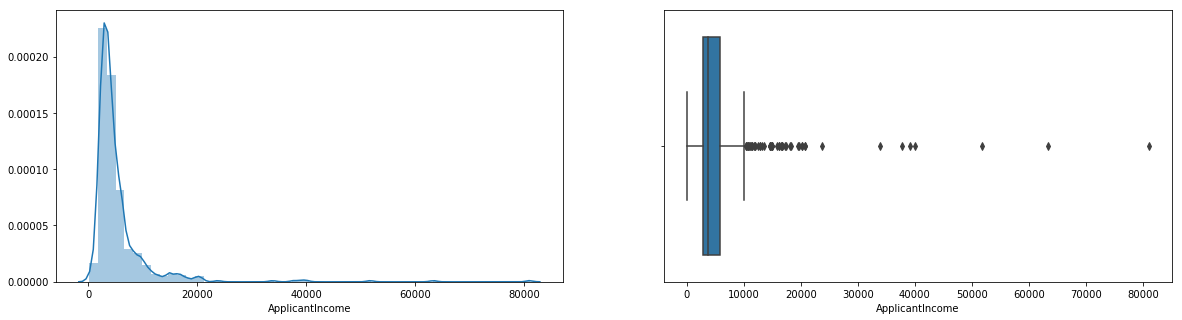

In [43]:
#Visualization and boxplot of ApplicantIncome column
plt.figure(figsize=(20,5));
plt.subplot(121);
sns.distplot(train['ApplicantIncome']);
plt.subplot(122);
sns.boxplot(train['ApplicantIncome'])
plt.show()

Conclusion: It is seen that Most of the Applicant's Income lies in the range of 0-15000 but many applicants income with higher income are seen in the boxplot. 

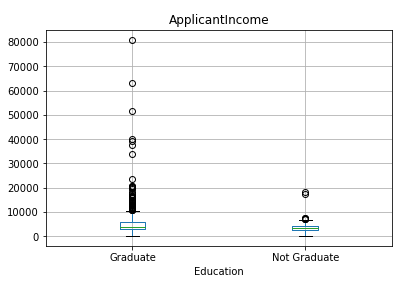

In [44]:
train.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

The Applicants who are Graducated have more Income compared to the Non Graduates.

#### Analysis on Feature CoapplicantIncome

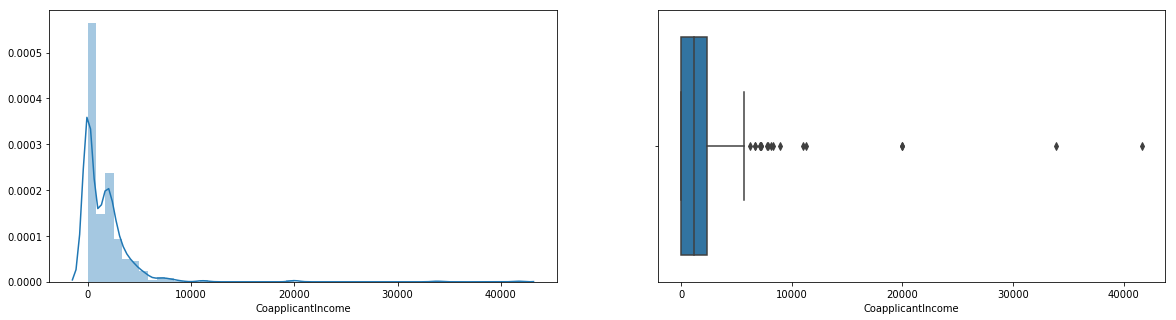

In [45]:
#Visualization and boxplot of CoapplicantIncome column
plt.figure(figsize=(20,5));
plt.subplot(121);
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122);
sns.boxplot(train['CoapplicantIncome'])
plt.show()

Most of the Coapplicants income range between 0-5000

#### Analysis on Feature LoanAmount

In [46]:
df=data_train.copy()

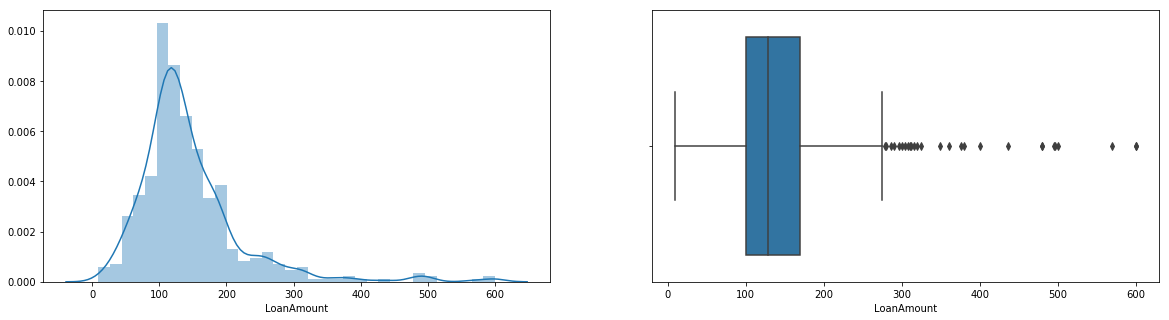

In [47]:
#Visualization and boxplot of LoanAmount column
plt.figure(figsize=(20,5));
plt.subplot(121);
df=df.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122);
sns.boxplot(df['LoanAmount'])
plt.show()

We can see many Outliers in this feature

### Dependent Variable: Loan_Status

In [48]:
#Counting total values in the column Loan_Status
train['Loan_Status'].count()

614

In [49]:
#Counting values belongs to each class of the Loan_Status column
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [50]:
train['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

Y    422
N    192
Name: Loan_Status, dtype: int64


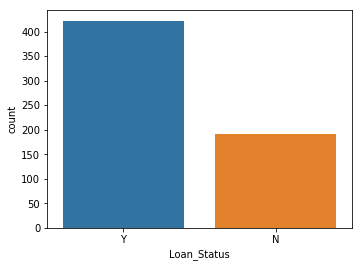

In [51]:
#Visualization of Loan_status Variable
plt.figure(figsize=(12,4));plt.subplot(122);sns.countplot(train['Loan_Status'])
print(train['Loan_Status'].value_counts())

69% of the applicants been approved for the loan i.e out of 614 applicants 422 applicant's application have been appoved.

## Bivariate Analysis 

### Categorical Independent Variables Vs Dependent Variable

#### Analysis of Gender Vs Loan_Status

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339





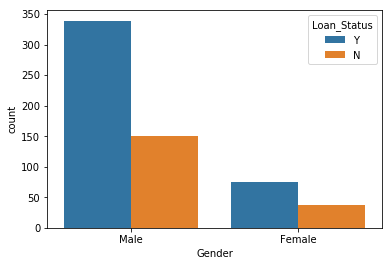

In [52]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))
print('\n\n')

sns.countplot('Gender', hue='Loan_Status',data=train)

Out of 112 female applicants 75 have been approved and out of 489 male applicants 339 have been approved.

#### Analysis of Married Vs Loan_Status

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285





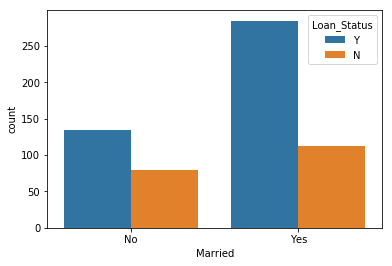

In [53]:
print(pd.crosstab(train['Married'],train['Loan_Status']))
print('\n\n')

sns.countplot('Married', hue='Loan_Status',data=train)

134 applicants who are unmarried got approved and 285 applicants who are Married got their loan approved.

#### Analysis of Self_Employed Vs Loan_Status

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56





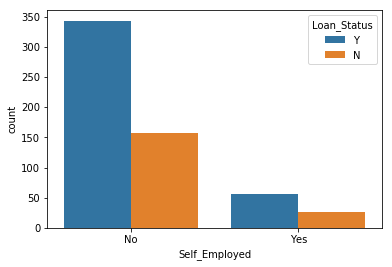

In [54]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))
print('\n\n')

sns.countplot('Self_Employed', hue='Loan_Status',data=train)

56 applicants who are self Employed and 343 applicants who are NOT self employed got their loan approved.

#### Feature Analysis of Credit_History Vs Loan_Status

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378





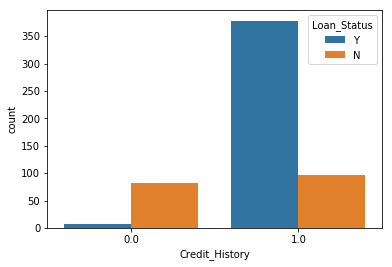

In [55]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))
print('\n\n')

sns.countplot('Credit_History', hue='Loan_Status',data=train)

only 7 applicants with credit history got their loan approved whereas 378 applicants with no credit history got loan approved.

### Ordinal Variables Vs Dependent Variables

#### Feature Analysis of Education Vs Loan_Status

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82





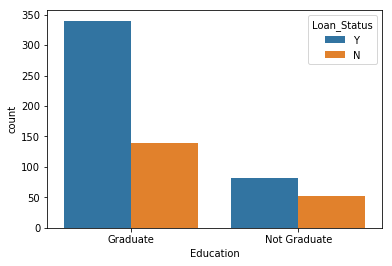

In [56]:
print(pd.crosstab(train['Education'],train['Loan_Status']))
print('\n\n')

sns.countplot('Education', hue='Loan_Status',data=train)

The applicants who are graduated have higher chances to get the loan than no graduated applicants.

#### Feature Analysis of Dependents Vs Loan_Status

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33





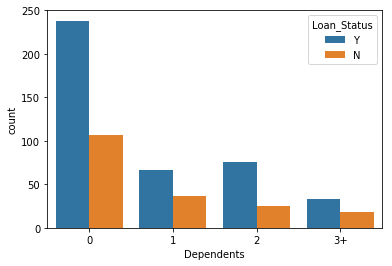

In [57]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))
print('\n\n')

sns.countplot('Dependents', hue='Loan_Status',data=train)

The applicants who have 0, 1 or 2 dependents have more chances to get the loan compared to 3+ dependents.

#### Feature Analysis of Property_Area Vs Loan_Status

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133





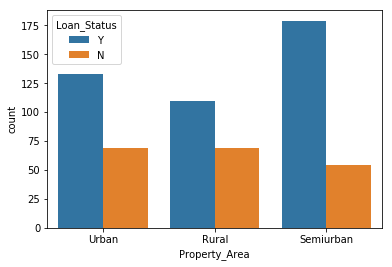

In [58]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))
print('\n\n')

sns.countplot('Property_Area', hue='Loan_Status',data=train)

The applicants who have properties in semiurban area have high chances to get the loan.

### Numerical Variables Vs Dependent Variable

#### Feature Analysis of ApplicantIncome Vs Loan_Status

<Figure size 720x360 with 0 Axes>

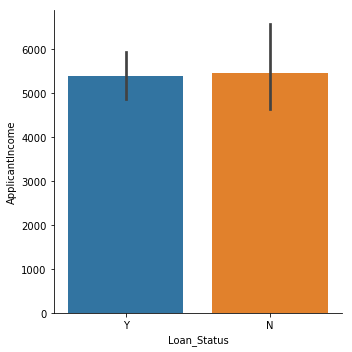

In [59]:
plt.figure(figsize=(10,5))
sns.catplot(x="Loan_Status", y="ApplicantIncome", kind="bar", data=train)
plt.show()

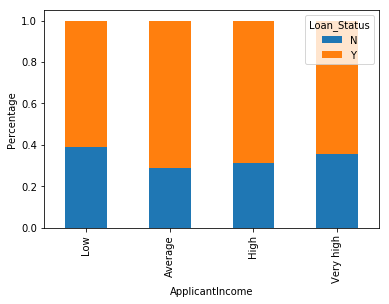

In [60]:
bins=[0,2000,4000,6000,8100];
group=['Low','Average','High','Very high']
train['Income']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income=pd.crosstab(train['Income'],train['Loan_Status'])
Income.div(Income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome');
plt.ylabel('Percentage')
plt.show()

It is seen that the only Income doesn't affect the chances of loan rejection 

#### Feature Analysis of CoapplicantIncome Vs Loan_Status

Text(0, 0.5, 'Percentage')

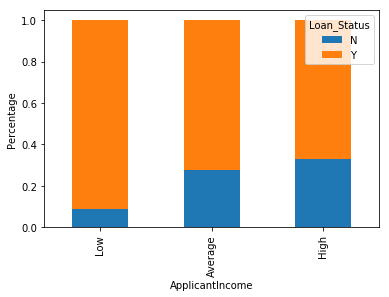

In [61]:
bins=[0,1200,2400,4200];group=['Low','Average','High']
train['Income']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Income=pd.crosstab(train['Income'],train['Loan_Status'])
Income.div(Income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome');plt.ylabel('Percentage')

It is seen that Coapplicant Income too put some weightage on the loan approval 

#### Feature Analysis of LoanAmount Vs Loan_Status

Text(0, 0.5, 'Percentage')

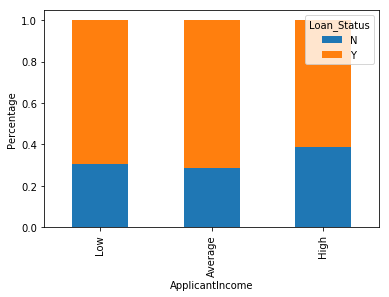

In [62]:
bins=[0,100,200,700];group=['Low','Average','High']
train['Income']=pd.cut(train['LoanAmount'],bins,labels=group)
Income=pd.crosstab(train['Income'],train['Loan_Status'])
Income.div(Income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome');plt.ylabel('Percentage')

It is seen that the percentage of loan approval is higher if the loan amount is low and average

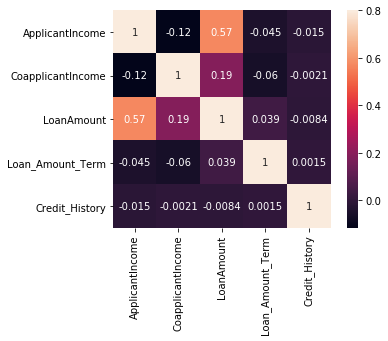

In [63]:
data=train.corr()
#f,ax=plt.subplots()
sns.heatmap(data,vmax=.8,square=True,annot=True)

## Preprocessing

#### Checking for Null/Missing Values

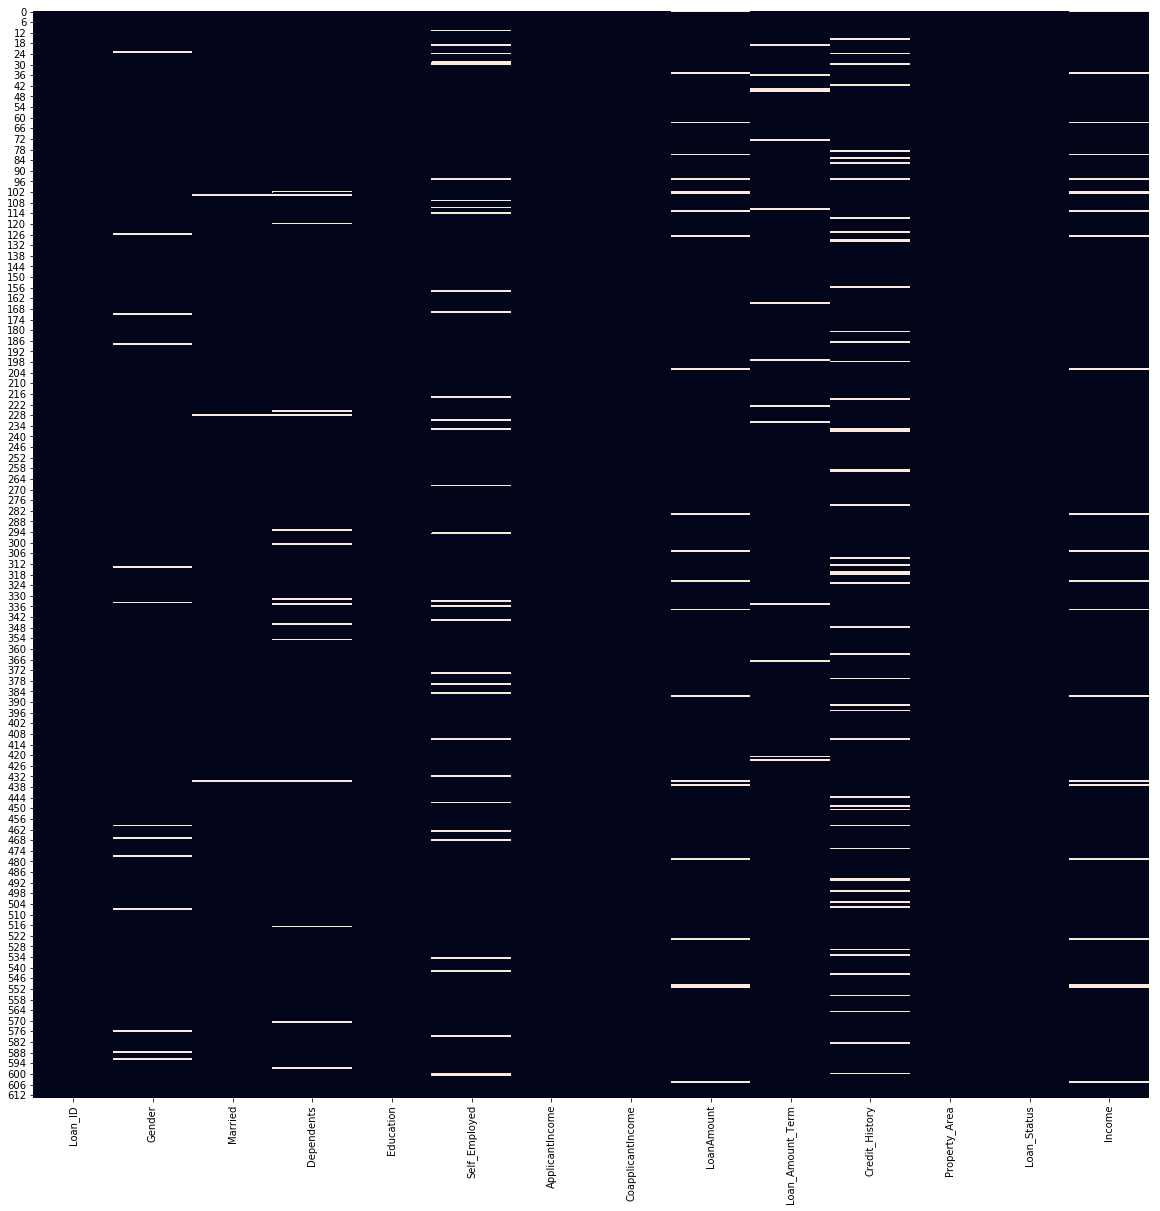

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(train.isnull(), cbar=False)
plt.show()

In [65]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
Income               22
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [66]:
test.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Married               0
Loan_ID               0
dtype: int64

#### Data Cleaning

In [67]:
# ckeck duplicate entries
train.duplicated().any()

False

In [68]:
# drop 'loan ID' column because it is not usefull
train.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

#### Imputing missing values

In [69]:
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0])
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].dropna().mode().values[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].dropna().mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().median())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().mode().values[0])

In [70]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,Average
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,Average


In [71]:
test['Gender'] = test['Gender'].fillna(test['Gender'].dropna().mode().values[0])
test['Married'] = test['Married'].fillna(test['Married'].dropna().mode().values[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].dropna().mode().values[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].dropna().mode().values[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].dropna().mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].dropna().median())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].dropna().mode().values[0])

#### Conversion of Categorical data into Numerical data

In [72]:
train["Gender"] = train["Gender"].map({"Male":1, "Female":0})
train["Married"] = train["Married"].map({"Yes":1, "No":0})
train['Dependents'].replace('3+', 3,inplace=True)
train['Dependents'] = train['Dependents'].astype(np.int)
train["Self_Employed"] = train["Self_Employed"].map({"Yes":1, "No":0})
train['Property_Area']=train['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})

In [73]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,1,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,2,1,NaN
1,1,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,0,0,Average
2,1,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,2,1,Low
3,1,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,2,1,Average
4,1,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,2,1,Average


In [74]:
test["Gender"] = test["Gender"].map({"Male":1, "Female":0})
test["Married"] = test["Married"].map({"Yes":1, "No":0})
test['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'] = test['Dependents'].astype(np.int)
test["Self_Employed"] = test["Self_Employed"].map({"Yes":1, "No":0})
test['Property_Area']=test['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})


In [75]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,Graduate,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,2


#### Label Encoding of Variable Education 

In [76]:
from sklearn.preprocessing import LabelEncoder
train['Education'] = LabelEncoder().fit_transform(train['Education'])
test['Education'] = LabelEncoder().fit_transform(test['Education'])

#### Removal of the Outliers using Log Transformation

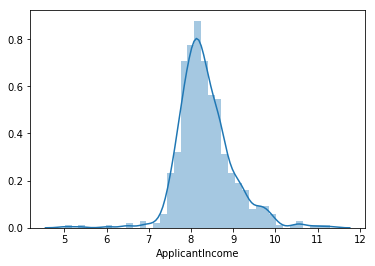

In [77]:
applicant=np.log(train['ApplicantIncome'])
sns.distplot(applicant)

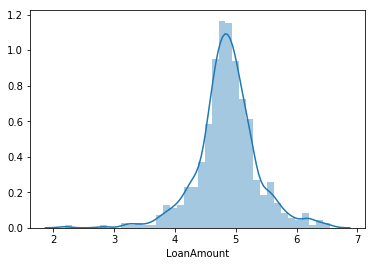

In [78]:
loan=np.log(train['LoanAmount'])
sns.distplot(loan)

#### Scatter plot and Correlation analysis

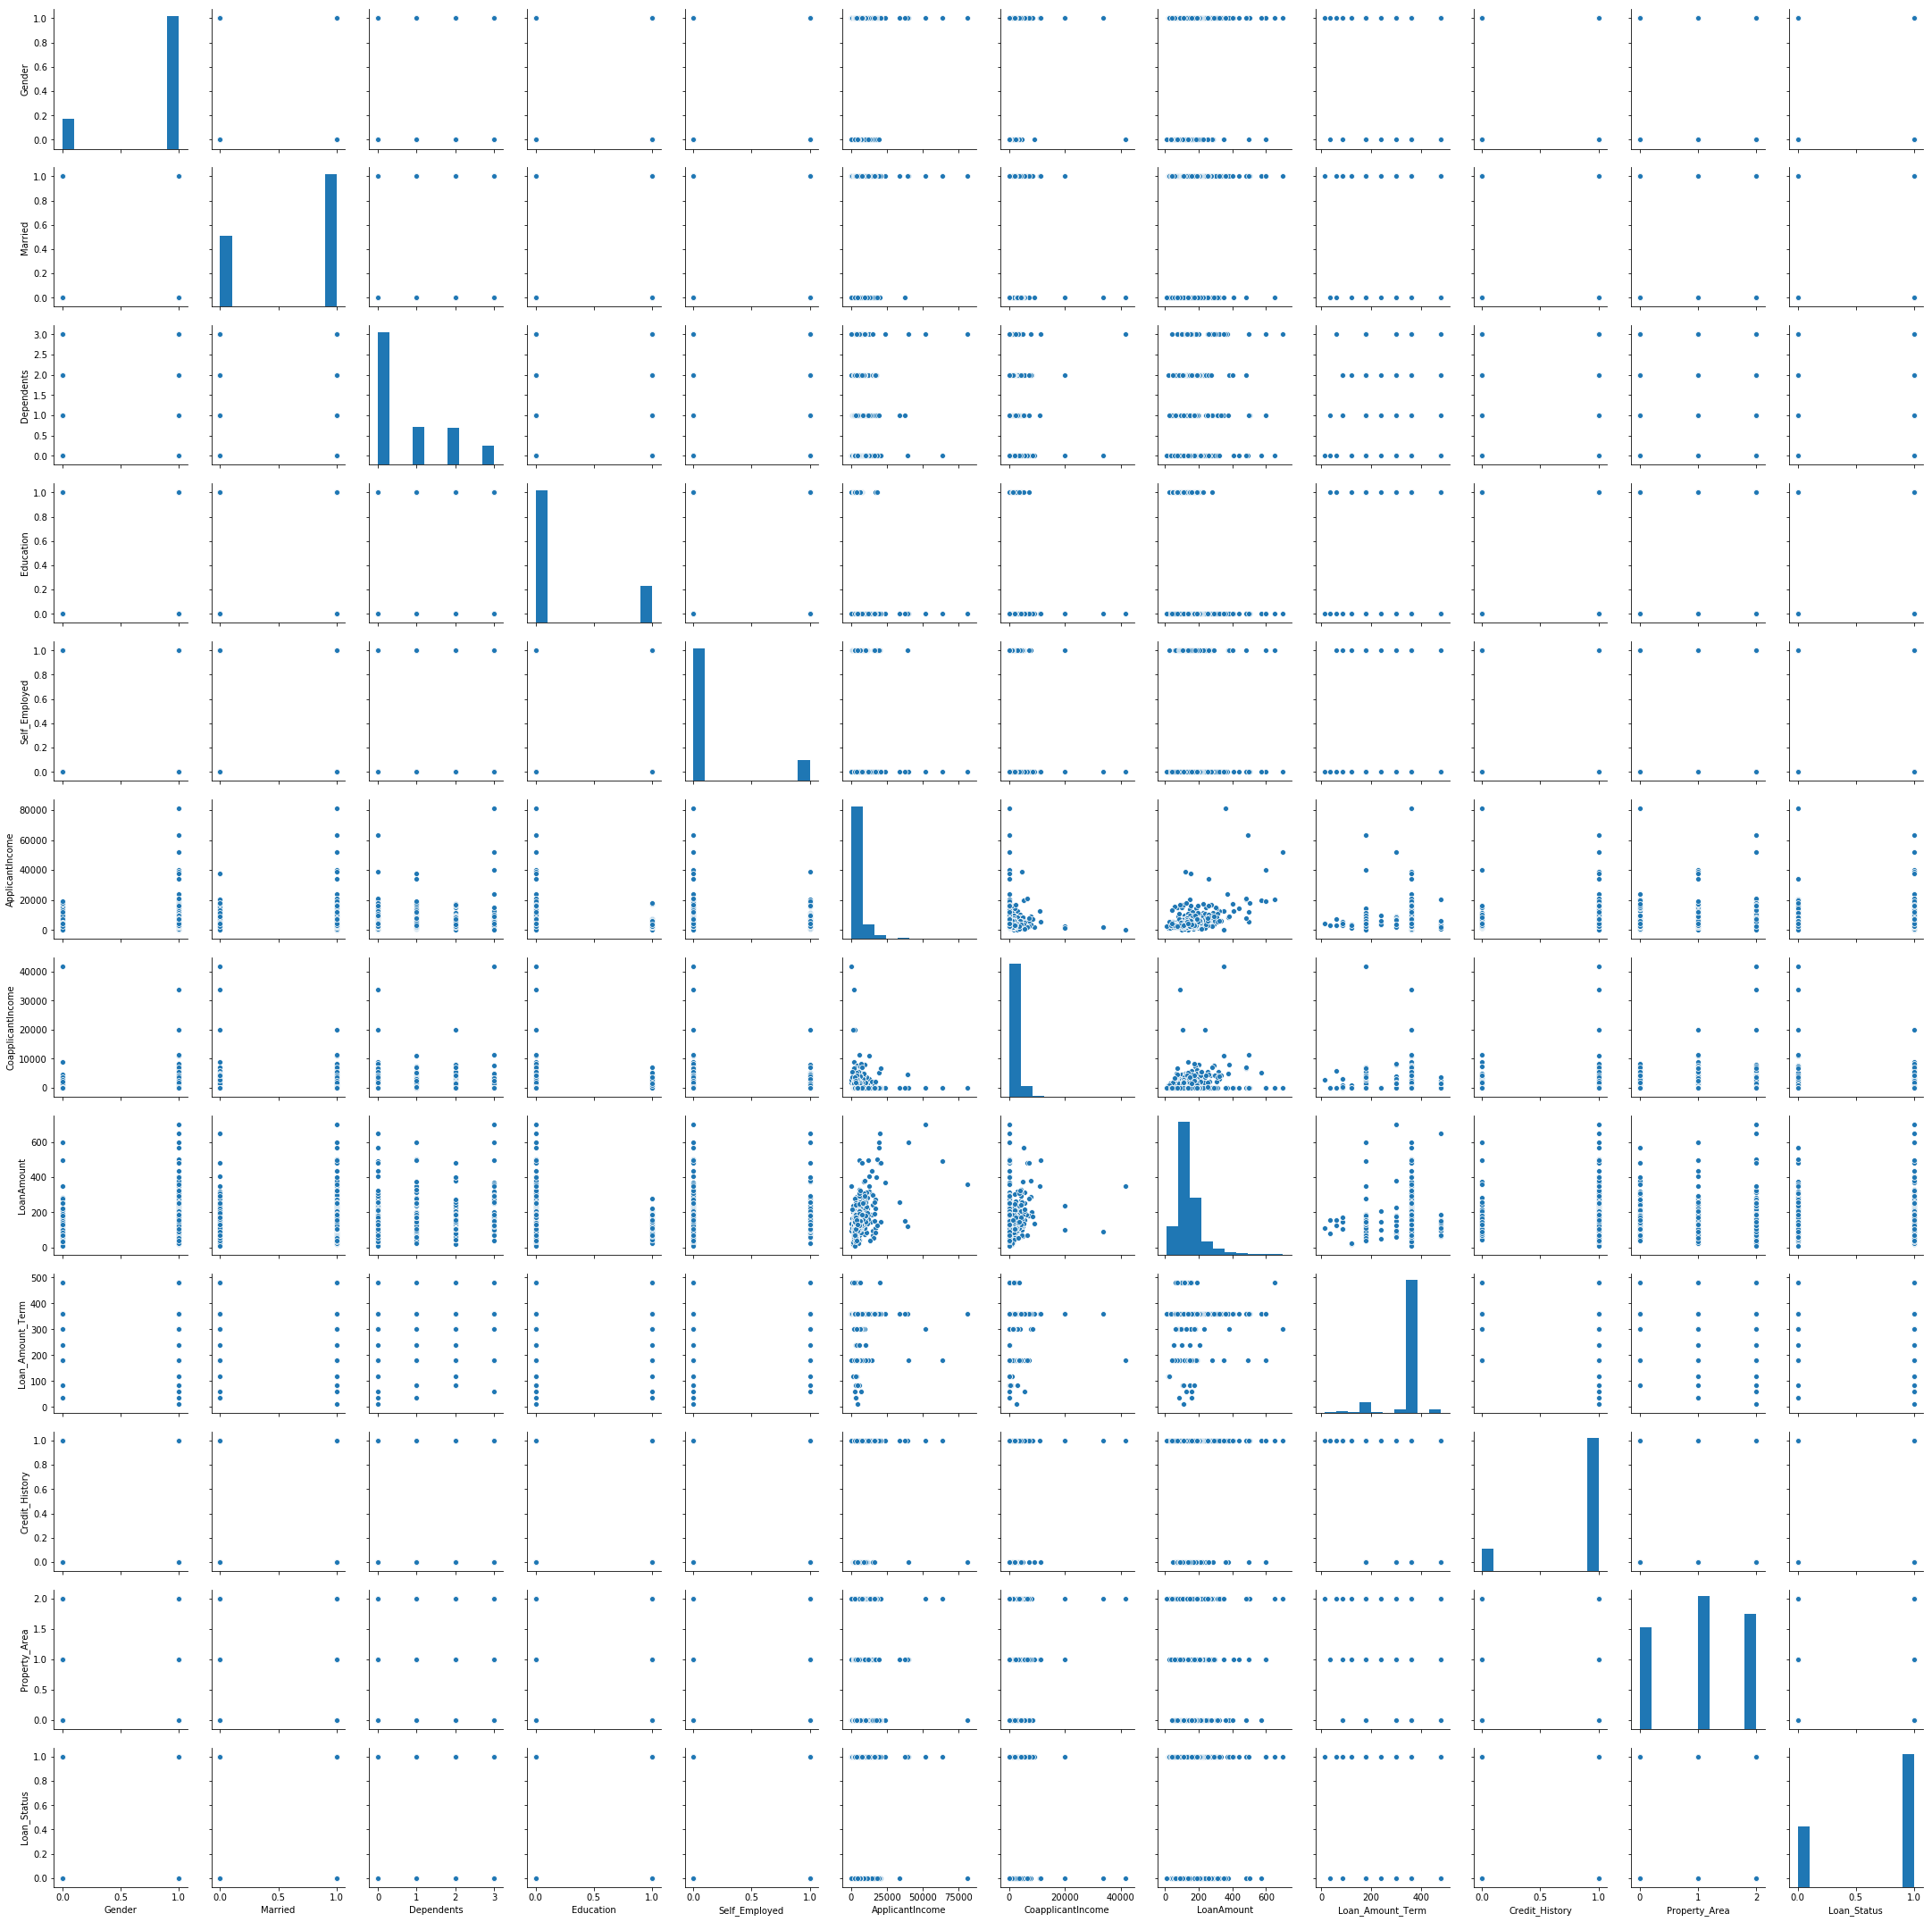

In [79]:
sns.pairplot(train)

### EXTRACTING REGRESSORS AND TARGET VARIABLE FROM THE DATA SET.

In [80]:
x=train.drop(['Loan_Status'],axis=1)
y=train['Loan_Status']

### COVERT IT INTO DUMMIES.

In [81]:
X= pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

## MODEL BUILDING.

### BUILDING A LOGISTIC REGRESSION MODEL.

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model_LR = LogisticRegression()
model_LR.fit(x_train, y_train)
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
y_pred = model_LR.predict(x_test)
Acc_LR = accuracy_score(y_test,y_pred)
Report_LR = classification_report(y_test,y_pred)
print(Report_LR)
print("Accuracy : {}".format(Acc_LR))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

   micro avg       0.83      0.83      0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123

Accuracy : 0.8292682926829268


### BUILDING A DECISION TREE MODEL.

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
model_DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [87]:
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
y_pred = model_DT.predict(x_test)
Acc_DT = accuracy_score(y_test,y_pred)
Report_DT = classification_report(y_test,y_pred)
print(Report_DT)
print("Accuracy : {}".format(Acc_DT))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

   micro avg       0.82      0.82      0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123

Accuracy : 0.8211382113821138


### BUILDING A RANDOM FOREST MODEL.

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model_RF = RandomForestClassifier(criterion = 'gini', max_depth = 5)

In [91]:
model_RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
y_pred = model_RF.predict(x_test)
Acc_RF = accuracy_score(y_test,y_pred)
Report_RF = classification_report(y_test,y_pred)
print(Report_RF)
print("Accuracy : {}".format(Acc_RF))

              precision    recall  f1-score   support

           0       0.74      0.42      0.54        33
           1       0.82      0.94      0.88        90

   micro avg       0.80      0.80      0.80       123
   macro avg       0.78      0.68      0.71       123
weighted avg       0.80      0.80      0.79       123

Accuracy : 0.8048780487804879


## BUILDING A KNN MODEL

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
# Declare the model
model_KNN = KNeighborsClassifier(n_neighbors=12)

# Train the model
model_KNN.fit(x_train, y_train)
y_pred = model_KNN.predict(x_test)

In [95]:
Acc_KNN = accuracy_score(y_test,y_pred)
Report_KNN = classification_report(y_test,y_pred)
print(Report_KNN)
print("Accuracy : {}".format(Acc_KNN))

              precision    recall  f1-score   support

           0       0.11      0.06      0.08        33
           1       0.70      0.81      0.75        90

   micro avg       0.61      0.61      0.61       123
   macro avg       0.40      0.44      0.41       123
weighted avg       0.54      0.61      0.57       123

Accuracy : 0.6097560975609756


In [96]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
n_neighbors = np.array(range(1,60))
param_grid = dict(n_neighbors=n_neighbors)
model_KNN = KNeighborsClassifier()
grid = GridSearchCV(estimator=model_KNN, param_grid=param_grid)
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.6822810590631364
{'n_neighbors': 51}


## BUILDING A SVM MODEL

In [97]:
from sklearn import svm
from sklearn.svm import SVC

##### Linear Support Vector Machine

In [98]:

model_SVM = SVC(gamma=0.7)
model_SVM.fit(x_train, y_train)
y_pred = model_SVM.predict(x_test)
Acc_SVM = accuracy_score(y_test,y_pred)
Report_SVM = classification_report(y_test,y_pred)

print(Report_SVM)
print("Accuracy : {}".format(Acc_SVM))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

   micro avg       0.73      0.73      0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123

Accuracy : 0.7317073170731707


##### Radical Support Vector Machine

## BUILDING A Naive Bayes MODEL

In [99]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
model_NB = GaussianNB() 
model_NB.fit(x_train, y_train) 
  
# making predictions on the testing set 
y_pred = model_NB.predict(x_test) 
  
Acc_NB = accuracy_score(y_test,y_pred)
Report_NB = classification_report(y_test,y_pred)
print(Report_NB)
print("Accuracy : {}".format(Acc_NB))

              precision    recall  f1-score   support

           0       0.82      0.42      0.56        33
           1       0.82      0.97      0.89        90

   micro avg       0.82      0.82      0.82       123
   macro avg       0.82      0.70      0.72       123
weighted avg       0.82      0.82      0.80       123

Accuracy : 0.8211382113821138


## BUILDING A XGboost MODEL

In [100]:
from xgboost import XGBClassifier
model_XGB=XGBClassifier() 
model_XGB.fit(x_train, y_train) 
y_pred= model_XGB.predict(x_test) 
Acc_XGB = accuracy_score(y_test, y_pred)
Report_XGB = classification_report(y_test,y_pred)
print(Report_XGB)
print("Accuracy: {}".format(Acc_XGB))

[14:20:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        33
           1       0.84      0.88      0.86        90

   micro avg       0.79      0.79      0.79       123
   macro avg       0.73      0.71      0.72       123
weighted avg       0.78      0.79      0.78       123

Accuracy: 0.7886178861788617


## BUILDING A Neural network  MODEL

In [101]:
from sklearn.neural_network import MLPClassifier
model_NN = MLPClassifier(hidden_layer_sizes = (4,4))
model_NN.fit(np.array(x_train), np.array(y_train))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [102]:
y_pred = model_NN.predict(x_test)
Acc_NN = accuracy_score(y_test,y_pred)
Report_NN = classification_report(y_test,y_pred)
print(Report_NN)
print("Accuracy : {}".format(Acc_NN))

              precision    recall  f1-score   support

           0       0.60      0.09      0.16        33
           1       0.75      0.98      0.85        90

   micro avg       0.74      0.74      0.74       123
   macro avg       0.67      0.53      0.50       123
weighted avg       0.71      0.74      0.66       123

Accuracy : 0.7398373983739838


### Creating a dataframe for model interpretation

In [103]:
models = {"MODEL":pd.Series(["Logistic Regression","Decision Tree","Random Forest","KNN","Support Vector Machine","Naive Bayes","XG-Boost","Neural Network"]), "Accuracy Score":pd.Series([Acc_LR,Acc_DT,Acc_RF,Acc_KNN,Acc_SVM,Acc_NB,Acc_XGB,Acc_NN])}
table_model = pd.DataFrame(models)
table_model

,MODEL,Accuracy Score
0,Logistic Regression,0.829268
1,Decision Tree,0.821138
2,Random Forest,0.804878
3,KNN,0.609756
4,Support Vector Machine,0.731707
5,Naive Bayes,0.821138
6,XG-Boost,0.788618
7,Neural Network,0.739837


## After building all the models we can conclude that accuracy of the Logistic Regression model is higher as compared to other model.
## so we conclude that Logistic Regression model is best fit model for given data set.

## PREDICTING THE TARGET COLUMN IN THE TEST DATA SET USING LOGISTIC REGRESSION MODEL.